In [4]:
from collections import Counter

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn import metrics
warnings.filterwarnings('ignore')

from sklearn.utils import shuffle
from imblearn.over_sampling import SMOTE
from sklearn.utils import resample
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso, ElasticNet
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn import linear_model
from sklearn import metrics
from sklearn.metrics import accuracy_score, recall_score, precision_score, roc_auc_score 
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_validate
from sklearn.model_selection import GridSearchCV

In [5]:
movie_df = pd.read_csv(r'data/data_regression.csv')

In [6]:
movie_df.columns

Index(['imdb_id', 'director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name',
       'movie_title', 'num_voted_users', 'cast_total_facebook_likes',
       'actor_3_name', 'facenumber_in_poster', 'plot_keywords',
       'num_user_for_reviews', 'language', 'country', 'content_rating',
       'budget', 'title_year', 'actor_2_facebook_likes', 'imdb_score',
       'movie_facebook_likes', 'Biography', 'Comedy', 'Crime', 'Drama',
       'Romance', 'Mystery_Thriller_Horror', 'Sci-Fi_Fantasy',
       'Family_Animation', 'Action_Adventure', 'History_War', 'Others',
       'director_rank', 'actor1_rank', 'actor2_rank', 'actor3_rank',
       'gross_budget_ratio'],
      dtype='object')

# 3)  Linear Regression With Ranks

In [7]:
classification3_df = movie_df.drop(columns=['imdb_id', 'director_name', 'num_critic_for_reviews',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name',
       'movie_title', 'num_voted_users',
       'actor_3_name', 'plot_keywords',
       'num_user_for_reviews',
       'title_year', 'actor_2_facebook_likes', 'imdb_score',
       'movie_facebook_likes'])

In [8]:
classification3_df = classification3_df[(classification3_df.gross_budget_ratio<=10) & (classification3_df.budget>=500000)]

In [9]:
Language = classification3_df['language'].transform(lambda x: x=='English')
Language = Language.to_frame()
Country = classification3_df['country'].transform(lambda x: x=='USA')
Country = Country.to_frame()
classification3_df['language'] = Language['language']
classification3_df['country'] = Country['country']
classification3_df["language"] = classification3_df["language"].astype(int)
classification3_df["country"] = classification3_df["country"].astype(int)

Above, we convert language to binary of English language and non-english and convert country variable to binary USA or not USA.

In [10]:
df3 = pd.get_dummies(classification3_df, columns=['content_rating'])

## 3.1) Ratio as y

In [11]:
df31 = df3.copy()

In [12]:
df31

,duration,cast_total_facebook_likes,facenumber_in_poster,language,country,budget,Biography,Comedy,Crime,Drama,...,actor2_rank,actor3_rank,gross_budget_ratio,content_rating_G,content_rating_NC-17,content_rating_Not Rated,content_rating_PG,content_rating_PG-13,content_rating_R,content_rating_X
0,123.0,22209,1.0,1,1,4.800000e+07,0,1,0,0,...,3,4,0.981155,0,0,0,0,1,0,0
3,148.0,2566,1.0,1,1,2.700000e+07,0,1,1,0,...,3,4,2.007407,0,0,0,0,0,1,0
4,98.0,14921,3.0,1,1,6.000000e+06,0,1,0,0,...,3,5,6.633333,0,0,0,0,0,1,0
5,124.0,1462,0.0,1,1,2.000000e+07,1,1,0,0,...,2,3,0.100000,0,0,0,1,0,0,0
6,124.0,2667,0.0,1,1,5.166449e+07,1,0,0,1,...,4,4,1.546517,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3846,121.0,6617,0.0,1,1,5.000000e+06,0,0,0,1,...,3,4,0.940072,0,0,0,0,1,0,0
3847,92.0,17860,0.0,1,1,3.500000e+07,0,1,0,0,...,3,4,1.579766,0,0,0,0,0,1,0
3848,100.0,18786,9.0,1,1,2.000000e+07,0,1,0,0,...,5,5,2.773065,0,0,0,0,0,1,0
3849,92.0,2848,4.0,1,1,5.000000e+06,0,1,0,0,...,4,4,2.335036,0,0,0,0,0,1,0


In [13]:
X = df31.drop(columns=['gross_budget_ratio'])
y = df31['gross_budget_ratio']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10) 
print(f"Dimensionality of X_train: {X_train.shape}")
print(f"Dimensionality of X_test : {X_test.shape}")
print(f"Dimensionality of y_train: {y_train.shape}")
print(f"Dimensionality of y_test : {y_test.shape}")

Dimensionality of X_train: (2580, 28)
Dimensionality of X_test : (1107, 28)
Dimensionality of y_train: (2580,)
Dimensionality of y_test : (1107,)


### 3.1.1) Ridge Regression

In [14]:
MMScaler = MinMaxScaler()
X_train_scaled = MMScaler.fit_transform(X_train)
X_test_scaled = MMScaler.transform(X_test)

In [17]:
parameters = {'alpha': np.concatenate((np.arange(0.1,2,0.1), np.arange(2, 5, 0.5), np.arange(5, 25, 1)))}
ridge = linear_model.Ridge()
clf1 = GridSearchCV(ridge, parameters, scoring ='neg_mean_squared_error')
clf1.fit(X_train_scaled, y_train)

y_pred = clf1.predict(X_test_scaled)

print("ridge best parameters:", clf1.best_params_)
print("ridge score:", clf1.score(X_test_scaled, y_test))
print("ridge MSE:", mean_squared_error(y_test, clf1.predict(X_test_scaled)))
print("ridge best estimator coef:", clf1.best_estimator_.coef_)

ridge best parameters: {'alpha': 2.5}
ridge score: -2.5151495827769086
ridge MSE: 2.5151495827769086
ridge best estimator coef: [-0.20973937  0.26724497 -0.33333311  0.13788896  0.47301643 -1.11893582
  0.12147692  0.07568381 -0.31475111 -0.28188124  0.02454982  0.01951616
 -0.17578054 -0.0934725  -0.15487111 -0.39393687 -0.02565417  1.55303775
 -0.00466667 -0.08101864 -0.0049064   0.38206349 -0.64291888 -0.9259292
  0.0347016  -0.24201353 -0.19675782  1.59085434]


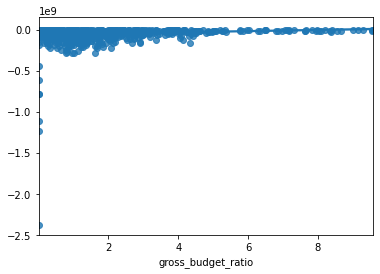

In [20]:
sns.regplot(y_test, clf1.predict(X_test))

In [21]:
comparison = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
comparison

,Actual,Predicted
273,3.146273,1.568794
2229,1.936943,1.856696
2870,0.344959,1.519761
2000,0.044179,0.800841
3731,0.786312,0.620275
...,...,...
287,0.693614,1.350165
649,1.197580,1.130180
1217,0.647856,1.211213
3373,0.005484,1.081560


### 3.1.2) Lasso Regression

In [22]:
parameters = {'alpha': np.concatenate((np.arange(0.1,2,0.1), np.arange(2, 5, 0.5), np.arange(5, 25, 1)))}
Lasso = linear_model.Lasso()
clf2 = GridSearchCV(Lasso, parameters, scoring ='neg_mean_squared_error')
clf2.fit(X_train_scaled, y_train)

y_pred = clf2.predict(X_test_scaled)

print("Lasso best parameters:", clf2.best_params_)
print("Lasso score:", clf2.score(X_test_scaled, y_test))
print("Lasso MSE:", mean_squared_error(y_test, clf2.predict(X_test_scaled)))
print("Lasso best estimator coef:", clf2.best_estimator_.coef_)

Lasso best parameters: {'alpha': 0.1}
Lasso score: -2.669695699837831
Lasso MSE: 2.669695699837831
Lasso best estimator coef: [-0.  0. -0.  0.  0. -0.  0.  0. -0. -0.  0. -0. -0.  0. -0. -0.  0.  0.
  0.  0.  0.  0. -0. -0.  0. -0. -0.  0.]


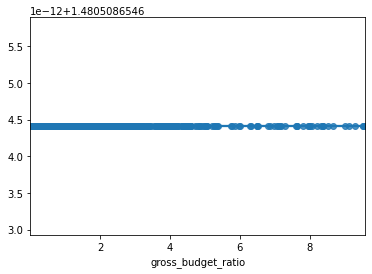

In [24]:
sns.regplot(y_test, clf2.predict(X_test))

In [25]:
comparison2 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
comparison2

,Actual,Predicted
273,3.146273,1.480509
2229,1.936943,1.480509
2870,0.344959,1.480509
2000,0.044179,1.480509
3731,0.786312,1.480509
...,...,...
287,0.693614,1.480509
649,1.197580,1.480509
1217,0.647856,1.480509
3373,0.005484,1.480509


### 3.1.3) ElasticNet

In [26]:
parameters = {'alpha': np.concatenate((np.arange(0.1,2,0.1), np.arange(2, 5, 0.5), np.arange(5, 25, 1)))}
EN = linear_model.ElasticNet()
clf3 = GridSearchCV(EN, parameters, scoring ='neg_mean_squared_error')
clf3.fit(X_train_scaled, y_train)

y_pred = clf3.predict(X_test_scaled)

print("ElasticNet best parameters:", clf3.best_params_)
print("ElasticNet score:", clf3.score(X_test_scaled, y_test))
print("ElasticNet MSE:", mean_squared_error(y_test, clf3.predict(X_test_scaled)))
print("ElasticNet best estimator coef:", clf3.best_estimator_.coef_)

ElasticNet best parameters: {'alpha': 0.1}
ElasticNet score: -2.6262512085017553
ElasticNet MSE: 2.6262512085017553
ElasticNet best estimator coef: [-0.          0.         -0.          0.          0.21178822 -0.
  0.          0.         -0.         -0.          0.         -0.
 -0.          0.         -0.         -0.          0.          0.
  0.          0.          0.          0.         -0.         -0.
  0.         -0.         -0.          0.        ]


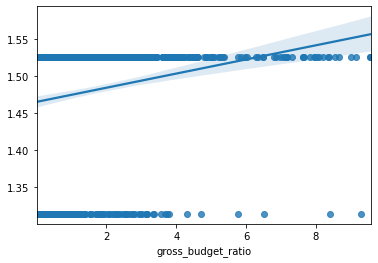

In [27]:
sns.regplot(y_test, clf3.predict(X_test))

In [28]:
comparison3 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
comparison3

,Actual,Predicted
273,3.146273,1.525739
2229,1.936943,1.525739
2870,0.344959,1.313951
2000,0.044179,1.313951
3731,0.786312,1.313951
...,...,...
287,0.693614,1.525739
649,1.197580,1.525739
1217,0.647856,1.313951
3373,0.005484,1.525739


## 3.2) Log-Ratio as y

In [29]:
df32 = df3.copy()
df32['gross_budget_ratio']=np.log(df32['gross_budget_ratio'])

In [30]:
df32

,duration,cast_total_facebook_likes,facenumber_in_poster,language,country,budget,Biography,Comedy,Crime,Drama,...,actor2_rank,actor3_rank,gross_budget_ratio,content_rating_G,content_rating_NC-17,content_rating_Not Rated,content_rating_PG,content_rating_PG-13,content_rating_R,content_rating_X
0,123.0,22209,1.0,1,1,4.800000e+07,0,1,0,0,...,3,4,-0.019025,0,0,0,0,1,0,0
3,148.0,2566,1.0,1,1,2.700000e+07,0,1,1,0,...,3,4,0.696844,0,0,0,0,0,1,0
4,98.0,14921,3.0,1,1,6.000000e+06,0,1,0,0,...,3,5,1.892107,0,0,0,0,0,1,0
5,124.0,1462,0.0,1,1,2.000000e+07,1,1,0,0,...,2,3,-2.302585,0,0,0,1,0,0,0
6,124.0,2667,0.0,1,1,5.166449e+07,1,0,0,1,...,4,4,0.436005,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3846,121.0,6617,0.0,1,1,5.000000e+06,0,0,0,1,...,3,4,-0.061799,0,0,0,0,1,0,0
3847,92.0,17860,0.0,1,1,3.500000e+07,0,1,0,0,...,3,4,0.457277,0,0,0,0,0,1,0
3848,100.0,18786,9.0,1,1,2.000000e+07,0,1,0,0,...,5,5,1.019953,0,0,0,0,0,1,0
3849,92.0,2848,4.0,1,1,5.000000e+06,0,1,0,0,...,4,4,0.848027,0,0,0,0,0,1,0


In [31]:
X = df32.drop(columns=['gross_budget_ratio'])
y = df32['gross_budget_ratio']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10) 
print(f"Dimensionality of X_train: {X_train.shape}")
print(f"Dimensionality of X_test : {X_test.shape}")
print(f"Dimensionality of y_train: {y_train.shape}")
print(f"Dimensionality of y_test : {y_test.shape}")

Dimensionality of X_train: (2580, 28)
Dimensionality of X_test : (1107, 28)
Dimensionality of y_train: (2580,)
Dimensionality of y_test : (1107,)


### 3.2.1) Ridge Regression

In [32]:
MMScaler = MinMaxScaler()
X_train_scaled = MMScaler.fit_transform(X_train)
X_test_scaled = MMScaler.transform(X_test)

In [33]:
parameters = {'alpha': np.concatenate((np.arange(0.1,2,0.1), np.arange(2, 5, 0.5), np.arange(5, 25, 1)))}
ridge = linear_model.Ridge()
clf1 = GridSearchCV(ridge, parameters, scoring ='neg_mean_squared_error')
clf1.fit(X_train_scaled, y_train)

y_pred = clf1.predict(X_test_scaled)

print("ridge best parameters:", clf1.best_params_)
print("ridge score:", clf1.score(X_test_scaled, y_test))
print("ridge MSE:", mean_squared_error(y_test, clf1.predict(X_test_scaled)))
print("ridge best estimator coef:", clf1.best_estimator_.coef_)

ridge best parameters: {'alpha': 0.5}
ridge score: -2.24214537544356
ridge MSE: 2.24214537544356
ridge best estimator coef: [ 1.48770111  0.1400481  -1.12343567  0.66457954  0.83732196 -8.02428992
  0.20263711  0.15922272 -0.22495299 -0.37152699 -0.03252746  0.12442777
 -0.12605493  0.1645495  -0.04231943 -0.34752694 -0.10992029  1.64585928
  0.19669404  0.19533072  0.34153352  0.50848739  0.07717942 -1.90495725
  0.19192094  0.1528247  -0.21517419  1.18971899]


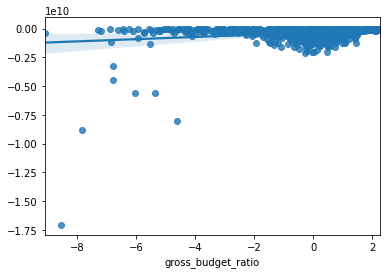

In [34]:
sns.regplot(y_test, clf1.predict(X_test))

In [35]:
comparison = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
comparison

,Actual,Predicted
273,1.146218,0.046089
2229,0.661111,0.156614
2870,-1.064329,-0.204616
2000,-3.119511,-1.523654
3731,-0.240402,-1.225091
...,...,...
287,-0.365839,-0.465391
649,0.180303,-0.400030
1217,-0.434087,-0.912377
3373,-5.205981,-0.833062


### 3.2.2) Lasso Regression

In [36]:
parameters = {'alpha': np.concatenate((np.arange(0.1,2,0.1), np.arange(2, 5, 0.5), np.arange(5, 25, 1)))}
Lasso = linear_model.Lasso()
clf2 = GridSearchCV(Lasso, parameters, scoring ='neg_mean_squared_error')
clf2.fit(X_train_scaled, y_train)

y_pred = clf2.predict(X_test_scaled)

print("Lasso best parameters:", clf2.best_params_)
print("Lasso score:", clf2.score(X_test_scaled, y_test))
print("Lasso MSE:", mean_squared_error(y_test, clf2.predict(X_test_scaled)))
print("Lasso best estimator coef:", clf2.best_estimator_.coef_)

Lasso best parameters: {'alpha': 0.1}
Lasso score: -2.621796933898332
Lasso MSE: 2.621796933898332
Lasso best estimator coef: [ 0.          0.         -0.          0.          0.64513208 -0.
  0.          0.         -0.         -0.         -0.         -0.
  0.          0.          0.         -0.         -0.          0.
  0.          0.          0.          0.          0.         -0.
  0.          0.         -0.          0.        ]


In [25]:
comparison2 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
comparison2

,Actual,Predicted
273,1.146218,-0.291496
2229,0.661111,-0.291496
2870,-1.064329,-0.936628
2000,-3.119511,-0.936628
3731,-0.240402,-0.936628
...,...,...
287,-0.365839,-0.291496
649,0.180303,-0.291496
1217,-0.434087,-0.936628
3373,-5.205981,-0.291496


### 3.2.3) ElasticNet

In [37]:
parameters = {'alpha': np.concatenate((np.arange(0.1,2,0.1), np.arange(2, 5, 0.5), np.arange(5, 25, 1)))}
EN = linear_model.ElasticNet()
clf3 = GridSearchCV(EN, parameters, scoring ='neg_mean_squared_error')
clf3.fit(X_train_scaled, y_train)

y_pred = clf3.predict(X_test_scaled)

print("ElasticNet best parameters:", clf3.best_params_)
print("ElasticNet score:", clf3.score(X_test_scaled, y_test))
print("ElasticNet MSE:", mean_squared_error(y_test, clf3.predict(X_test_scaled)))
print("ElasticNet best estimator coef:", clf3.best_estimator_.coef_)

ElasticNet best parameters: {'alpha': 0.1}
ElasticNet score: -2.5609511110360703
ElasticNet MSE: 2.5609511110360703
ElasticNet best estimator coef: [ 0.          0.         -0.          0.12854711  0.6847681  -0.
  0.          0.         -0.         -0.12618967 -0.         -0.
  0.          0.          0.         -0.         -0.          0.
  0.          0.          0.          0.          0.         -0.02378855
  0.          0.03577447 -0.08977245  0.        ]


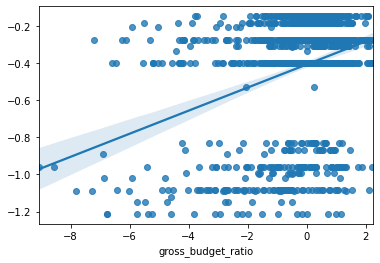

In [38]:
sns.regplot(y_test, clf3.predict(X_test))

In [27]:
comparison3 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
comparison3

,Actual,Predicted
273,1.146218,-0.184028
2229,0.661111,-0.148254
2870,-1.064329,-0.833022
2000,-3.119511,-1.084758
3731,-0.240402,-0.959212
...,...,...
287,-0.365839,-0.399990
649,0.180303,-0.148254
1217,-0.434087,-0.833022
3373,-5.205981,-0.399990
